<a href="https://colab.research.google.com/github/LatifulJoy/covid19-cnn-TL-mobilenet/blob/main/covid19_cnn_tl(31_7_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

# Uploading The Dataset

In [2]:
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"latifuljoy","key":"6185aededb032b60eabd5d17558407db"}'}

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
!kaggle datasets download -d latifuljoy/covid-chest-xray-image-dataset

 99% 481M/484M [00:13<00:00, 30.4MB/s]
100% 484M/484M [00:13<00:00, 36.9MB/s]


In [5]:
!unzip \*.zip

Archive:  covid-chest-xray-image-dataset.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png 

In [6]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 536 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 536 images in '/content/COVID_IEEE/normal'.


In [7]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

# Visualizing the Images

In [8]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person339_virus_695.jpeg']
image shape (1040, 1320)


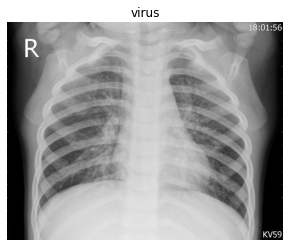

In [9]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0563-0001.jpeg']
image shape (1425, 1546)


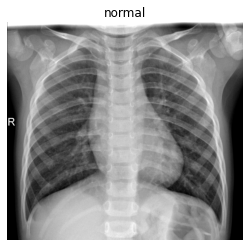

In [10]:
img = view_image("/content/COVID_IEEE/","normal")

['covid1900442.png']
image shape (480, 640, 3)


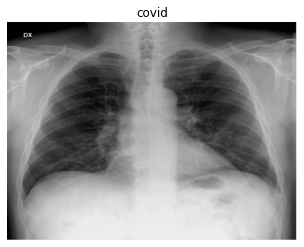

In [15]:
img = view_image("/content/COVID_IEEE/","covid")

# Reshaping the Dataset

In [16]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [17]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [18]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

# Normalize The dataset

In [19]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

# Train Test Split Dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state= 0)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [29]:
print("The size of the test dataset is: ", X_test.shape)
print("The size of the remaining dataset is : ", X_train.shape)

The size of the test dataset is:  (322, 224, 224, 3)
The size of the remaining dataset is :  (1286, 224, 224, 3)


In [30]:
#Split again into train and test to create small training and testing dataset
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of test dataset is: ", X_test.shape)
print("The size of validation dataset is: ", X_valid.shape)

The size of training dataset is:  (1286, 224, 224, 3)
The size of test dataset is:  (322, 224, 224, 3)
The size of validation dataset is:  (322, 224, 224, 3)


# Developed CNN Model

In [36]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [37]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

Dropout(0.25)

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))
Dropout(0.25)

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))
Dropout(0.25)

#Block Number 4
model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))
Dropout(0.25)


# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
Dropout(0.25)

model.add(Dense(units=512, activation="relu"))
Dropout(0.25)

model.add(Dense(units=128, activation="relu"))
Dropout(0.25)

model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer= opt ,loss='kullback_leibler_divergence',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 activation_17 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      18496     
                                                      

In [39]:
history = model.fit(
    X_train, y_train,
    validation_split=0.25, 
    epochs=30,
    batch_size=32,
    max_queue_size =100,
    workers =3,
    use_multiprocessing= True, verbose=1)

Epoch 1/30
31/31 [==============================] - 5s 140ms/step - loss: 1.0500 - accuracy: 0.5073 - val_loss: 0.8917 - val_accuracy: 0.5559
Epoch 2/30
31/31 [==============================] - 4s 127ms/step - loss: 0.7431 - accuracy: 0.6193 - val_loss: 0.7034 - val_accuracy: 0.7205
Epoch 3/30
31/31 [==============================] - 4s 127ms/step - loss: 0.6469 - accuracy: 0.6909 - val_loss: 0.6667 - val_accuracy: 0.5994
Epoch 4/30
31/31 [==============================] - 4s 128ms/step - loss: 0.5583 - accuracy: 0.7427 - val_loss: 0.5551 - val_accuracy: 0.7484
Epoch 5/30
31/31 [==============================] - 4s 136ms/step - loss: 0.4653 - accuracy: 0.8019 - val_loss: 0.4621 - val_accuracy: 0.8447
Epoch 6/30
31/31 [==============================] - 4s 130ms/step - loss: 0.3639 - accuracy: 0.8620 - val_loss: 0.3453 - val_accuracy: 0.8851
Epoch 7/30
31/31 [==============================] - 4s 131ms/step - loss: 0.2718 - accuracy: 0.9025 - val_loss: 0.2747 - val_accuracy: 0.8975
Epoch 

# Viewing the Loss and Accuracy Curve

Text(0.5, 1.0, 'Accuracy Curves')

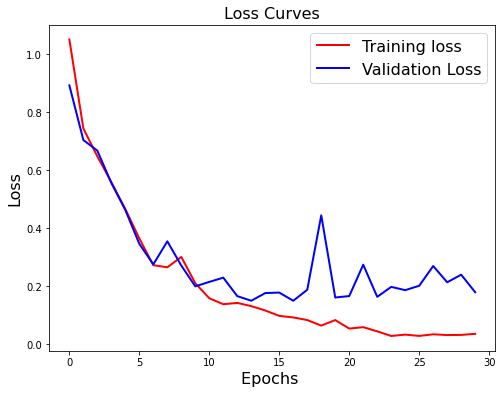

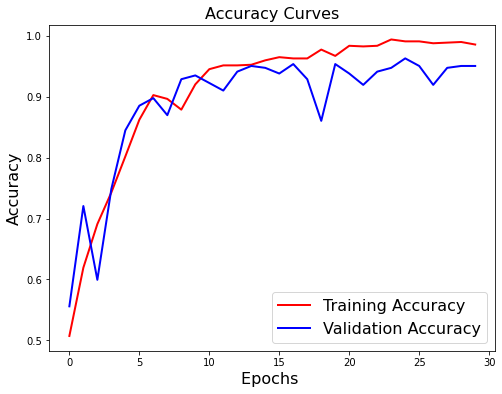

In [40]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [41]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)
y_pred

array([2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1,

# Classification Report

In [42]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.94      0.96      0.95       111
           2       0.94      0.93      0.93       108

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



# Confusion Matrix

In [43]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,101,0,2
normal,0,107,4
virus,1,7,100


# Test Accuracy

In [44]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

11/11 [==============================] - 1s 43ms/step - loss: 0.1502 - accuracy: 0.9565
['loss', 'accuracy']
[0.15021158754825592, 0.95652174949646]


In [45]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.15021158754825592
accuracy:  0.95652174949646


# MobileNet

In [46]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 0s 0us/step


In [64]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=128, activation="relu")(model)
Dropout(0.25)


prediction_layer = Dense(units=3, activation="softmax")(model)

In [66]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [67]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer= opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [69]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=20, batch_size=32)

Epoch 1/20
31/31 [==============================] - 4s 84ms/step - loss: 0.8122 - accuracy: 0.7842 - val_loss: 0.1040 - val_accuracy: 0.9534
Epoch 2/20
31/31 [==============================] - 2s 60ms/step - loss: 0.0798 - accuracy: 0.9710 - val_loss: 0.1152 - val_accuracy: 0.9534
Epoch 3/20
31/31 [==============================] - 2s 61ms/step - loss: 0.0312 - accuracy: 0.9865 - val_loss: 0.1138 - val_accuracy: 0.9565
Epoch 4/20
31/31 [==============================] - 2s 63ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0990 - val_accuracy: 0.9596
Epoch 5/20
31/31 [==============================] - 2s 61ms/step - loss: 0.0149 - accuracy: 0.9990 - val_loss: 0.0724 - val_accuracy: 0.9689
Epoch 6/20
31/31 [==============================] - 2s 61ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0878 - val_accuracy: 0.9658
Epoch 7/20
31/31 [==============================] - 2s 62ms/step - loss: 0.0130 - accuracy: 0.9990 - val_loss: 0.0705 - val_accuracy: 0.9689
Epoch 8/20
31

Text(0.5, 1.0, 'Accuracy Curves')

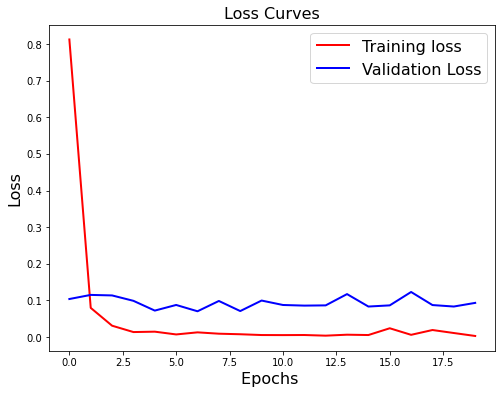

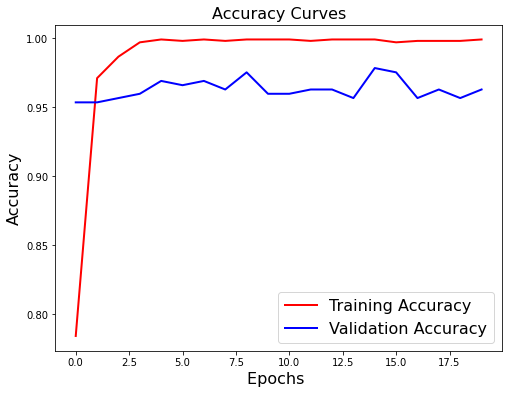

In [70]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [71]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [72]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       103
           1       0.93      0.96      0.95       111
           2       0.94      0.94      0.94       108

    accuracy                           0.95       322
   macro avg       0.96      0.95      0.95       322
weighted avg       0.95      0.95      0.95       322



**Test Accuracy**

In [73]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

11/11 [==============================] - 0s 40ms/step - loss: 0.1731 - accuracy: 0.9534
['loss', 'accuracy']
[0.17313608527183533, 0.9534161686897278]


In [74]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.17313608527183533
accuracy:  0.9534161686897278


In [75]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,99,1,3
normal,0,107,4
virus,0,7,101


# DenseNet121

In [76]:
densenet = tf.keras.applications.DenseNet121(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in densenet.layers:
  layer.trainable =False

29097984/29084464 [==============================] - 0s 0us/step


In [85]:
model = Flatten()(densenet.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=128, activation="relu")(model)
Dropout = 0.25

prediction_layer = Dense(units=3, activation="softmax")(model)

In [86]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=.0005)

In [87]:
model = Model(inputs = densenet.input, outputs = prediction_layer)
model.compile(optimizer=opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [89]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=15, batch_size=32)

Epoch 1/15
31/31 [==============================] - 13s 214ms/step - loss: 2.3485 - accuracy: 0.6836 - val_loss: 0.1307 - val_accuracy: 0.9503
Epoch 2/15
31/31 [==============================] - 5s 151ms/step - loss: 0.2438 - accuracy: 0.9367 - val_loss: 0.1074 - val_accuracy: 0.9565
Epoch 3/15
31/31 [==============================] - 5s 151ms/step - loss: 0.0881 - accuracy: 0.9720 - val_loss: 0.7209 - val_accuracy: 0.8106
Epoch 4/15
31/31 [==============================] - 5s 152ms/step - loss: 0.2243 - accuracy: 0.9315 - val_loss: 0.2232 - val_accuracy: 0.9410
Epoch 5/15
31/31 [==============================] - 4s 145ms/step - loss: 0.1736 - accuracy: 0.9575 - val_loss: 0.2537 - val_accuracy: 0.9348
Epoch 6/15
31/31 [==============================] - 5s 153ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.1220 - val_accuracy: 0.9565
Epoch 7/15
31/31 [==============================] - 5s 152ms/step - loss: 0.0878 - accuracy: 0.9720 - val_loss: 0.2839 - val_accuracy: 0.9317
Epoch

Text(0.5, 1.0, 'Accuracy Curves')

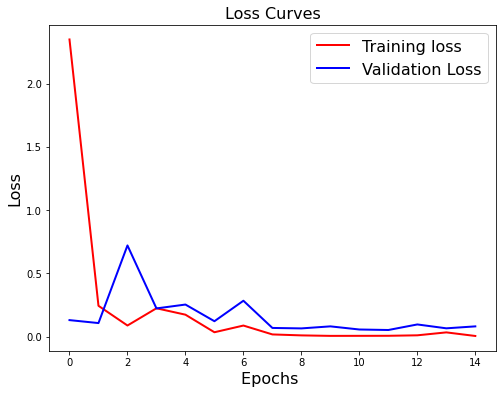

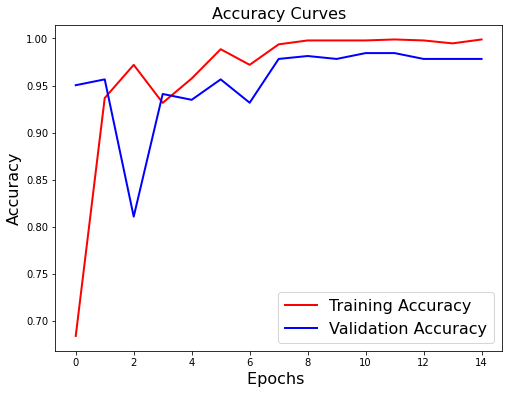

In [90]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [91]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [92]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       103
           1       0.94      0.95      0.94       111
           2       0.94      0.94      0.94       108

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



In [93]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

11/11 [==============================] - 1s 96ms/step - loss: 0.2152 - accuracy: 0.9565
['loss', 'accuracy']
[0.21522265672683716, 0.95652174949646]


In [94]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.21522265672683716
accuracy:  0.95652174949646


In [95]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,101,1,1
normal,0,105,6
virus,0,6,102
